# 机器学习简介

**机器学习**（**machine learning**）通常被看做是**人工智能**（**artificial intelligence**）的一部分，通常指用一些**算法**（**algorithm**）和**统计模型**（**statistical model**）让计算机通过学习一些特定的模式、特征，完成一些特定的任务，而不需要太多的人工干预。

最常见的机器学习算法可以分为两种:

* **监督学习**（**supervised learning**）：适用于带有**标签**（**labels**）的学习算法，通过算法和模型确定一些**特征**（**features**）的函数，对目标变量进行预测。比如我们常见的各种**回归**（**regression**）在机器学习中是典型的监督学习算法。根据标签的不同，监督学习又可以分为：
    - **分类**（**classification**），标签为离散变量
    - **回归**（**regression**），标签为连续变量
* **无监督学习**（**unsupervised learning**）：适用于没有标签的学习算法，通过发现数据中的结构对数据进行一些操作，比如**聚类**（**clustering**）、**降维**（**dimension reduction**）等。

此外还有**半监督学习**（**semi-supervised learning**），指的是针对标签不完整的数据的学习算法。除了以上分类之外，还有**增强学习**（**reinforcement learning**）等等很多领域。

在机器学习中，通常将已有的数据成为**训练集**（**training set**）或者**训练数据**（**training data**），机器学习的任务就是从训练集中找到特征的特定函数（模式），对新的数据进行预测。学习到的模型对于新样本的预测能力一般称之为**泛化**（**generalization**）能力。

## 过拟合与欠拟合

机器学习的目的是通过对训练集的训练，得到一个函数，对未知的新数据做预测。一方面，模型应该要有足够的预测和拟合能力，如果模型的拟合能力不足，没有发现本可以在训练集中发现的模式，我们称之为**欠拟合**（**underfitting**）；另一方面，如果一味提高拟合和预测能力，那么不可避免的会选择复杂度更高的模型，错误地将一些数据中的噪音当做信号进行拟合，我们称之为**过拟合**（**overfitting**）。

![](pic/fitting.png "过拟合、欠拟合与恰好拟合")

欠拟合会导致预测能力低下，而过拟合会导致虽然在训练集上看起来有非常好的预测效果，但是对于样本外的新数据进来，预测效果却很差，或者说泛化能力很差。两者都是在建模师需要避免的。为此，我们需要更加科学的评价模型的方法。


## 分类问题的模型评价方法

分类（classification）是机器学习中使用最广的一类方法，有很多分类方法可以使用，比如Logistic回归、分类树、随机森林、支持向量机、Naive Bayes等等等等。而由于分类问题的标签是离散变量，因而针对分类问题也有一些评价标准的其他准则。

接下来我们以二分类为例，假设有两种标签（正，反），记$y_{i}=1$代表正例，$y_{i}=0$代表反例。得到模型之后我们可以进行预测，那么$\hat{y}_{i}=1$代表预测为正，$\hat{y}_{i}=0$代表预测为负。

如此，我们可以将样本分为四类：

1. **真正**（**True Positive， TP**）：$y_{i}=1,\hat{y}_{i}=1$

2. **假正**（**False Positive， FP**）：$y_{i}=0,\hat{y}_{i}=1$

3. **真反**（**True Negative， TN**）：$y_{i}=0,\hat{y}_{i}=0$

4. **假反**（**False Negative， FN**）：$y_{i}=1,\hat{y}_{i}=0$

这四类中，TP和TN为正确预测，而FP和FN为错误预测。我们可以使用以上四个分类分别定义：

• **查准率**（**precision**），即所有预测为正的样本中，正确的比例：$$Precision=\frac{TP}{TP+FP}$$

• **查全率**（或者**召回率**，**recall**），即所有正的样本中，正确的比例：$$Recall=\frac{TP}{TP+FN}$$

• **精度**（**accuracy**），即所有样本中预测正确的比例：$$Accuracy=\frac{TP+TN}{TP+FP+TN+FN}$$

• **F1度量**，即查准率和查全率的调和平均：$$F1=\frac{2\times Precision\times Recall}{Precision+Recall}=\frac{1}{\frac{1}{2}\left(\frac{1}{Precision}+\frac{1}{Recall}\right)}$$

查准率和查全率之间通常存在着权衡：比如，如果我们希望提高查准率，需要减少预测为正的比例，这通常会减少预测为正的比例，因而会降低查全率。使得查准率等于查全率的点称为**平衡点**（**break-event point, BEP**）。以上这些指标都可以用于比较不同模型的预测结果。

此外，我们还可以定义：

• **敏感性**（**sensitivity**）：观察到的正的样本中，预测正确的比例，即$$Sensitivity=Recall=\frac{TP}{TP+FN}$$

• **特异性**（**specificity**）：观察到的反的样本中，预测正确的比例，即$$Specificity=\frac{TN}{TN+FP}$$

有了该定义后，可以构造**受试者工作特征曲线**（**receiver operating characteristic curve， ROC curve**）。

很多情况下，我们的模型会给出一个预测的概率值：$\hat{p_i}$，并确定一个临界值$c$来确定预测值，即当$\hat{p_i}\geq c$时$\hat{y_i}=1$，否则即$\hat{y_i}=0$。

当$c\in\left[0,1\right]$时，敏感性和特异性都会随之改变，从而有了敏感性曲线和特异性曲线：

![](pic/sens_speci.png "敏感性曲线与特异性曲线")

ROC曲线就是当$c$变化时，以$1-Specificity$作为横坐标，以$Sensitivity$作为纵坐标所画出来的图。

![](pic/roc.png "ROC曲线")

当$c=0$时，所有的$\hat{y}_{i}=1$，因而$Sensitivity=1$，$1-Specificity=1$；当$c=1$时，所有的$\hat{y}_{i}=0$，因而$Sensitivity=0$，$1-Specificity=0$，因而ROC曲线从$\left(0,0\right)$出发，到$\left(1,1\right)$终止。一个理想的模型应该是$1-Specificity$很小，同时$Sensitivity$很大，因而ROC曲线越向$\left(0,1\right)$弯曲，表明模型的预测能力越好。

为此，一个度量模型预测能力的指标即计算**ROC曲线的线下面积**（**area under ROC curve, AUC**），AUC越大，则模型的预测能力越强。

## 机器学习的一般步骤

与其他的数据分析一样，机器学习也需要数据的累积以及对数据的仔细清洗。在进行模型分析之前的数据清洗、特征提取等前期工作可以很大程度上避免garbage in garbage out，是非常重要的。

一般而言我们使用数据做分析的步骤如下：

### 1. 获取数据

数据很多情况下是现成的，当然很多时候获取数据非常困难，我们可能需要从网络上去爬取数据，有时甚至需要去搜集很多pdf、图像等数据。好在现在网络上已经有很多公开数据可以使用。

即使获取数据比较轻松，一个比较麻烦的问题是标签的获取。特别是在监督学习中，没有标签就不可能进行接下来的分析。由于标签是机器学习的benchmark，如果标签的误差比较大或者缺失太多，对模型的准确性影响特别大，需要特别注意。

### 2. 清洗数据

得到数据之后需要对数据进行一些必要的清洗工作，因为我们得到的数据总归是不完美的，而且经常是非常混乱的，此时我们需要对数据进行一些仔细的清洗，比如对数据进行初步的缺失值处理（填充、虚拟变量）、合并、删减、标签化，以及对文本数据的分词、删除停用词等等操作。

### 3. 特征工程

接下来，在清洗好数据的基础上，需要在已有的信息上提取特征，比如对某些变量进行适当变换（对数、虚拟变量）、将文本转变为向量、将图像转变为可识别的tensor等等。

这一步非常重要，如果将机器学习看成是某种程度上的函数拟合器的话，好的特征工程可以降低函数的复杂性，从而更容易达到更好的效果。往往我们需要思考以现有的数据，何种特征结合模型才能有更好的结果，这需要对应用背景、数据以及模型的深刻理解。

### 4. 模型训练

这一步通常来讲反倒是最简单的，有了以上铺垫之后，通常算法都是现成的，调包侠都会做。

### 5. 模型评价

接下来使用各种方法评价模型，对模型的精准性做出判断，并重复以上四个步骤进行改进。

# Scikit-Learn简介

Python中有非常多的机器学习相关的包和库，其中Scikit-Learn（ https://scikit-learn.org/stable/ ）由于比较统一的接口和易用性，成为了这些包里面最为流行的一个。

Scikit-Learn建立在NumPy和SciPy的基础上，当然，支持NumPy就意味着Pandas也完全支持。比如如果需要做一些理论研究、模拟工作，NumPy+SciPy+Pandas可以很好的配合起来解决问题，而如果需要实际数据，Pandas的数据管理能力配合Scikit-Learn也非常方便。

对于非监督学习，通常我们只需要使用Pandas或者NumPy整理好需要的数据即可；而对于监督学习，除了准备好特征数据$X$之外，还需要准备好标签向量$y$。

常见的机器学习算法，包括分类、聚类、回归等等，以及包括交叉验证、正则化等都已经在Scikit-Learn中有很好的实现，甚至包括一些特征提取的功能，比如文本数据的特征提取的一些常用方法，也都在Scikit-Learn中有实现。具体教程和文档可以参考其官方网站。

在这里，我们先以大家最为熟悉的线性回归、Logistic回归为例，介绍Scikit-Learn的使用方法。此外，我们还将额外介绍另一个常用的分类算法：分类树和随机森林。

## Logistic回归

Logistic回归（Logit回归）是非常常用的解决二分类问题的统计方法，在计量经济学中也有广泛的应用。

由于Logistic回归非常常见，我们在此就不再详细介绍其技术细节，我们以预测女性是否退出劳动力市场为例，介绍其用法：

In [1]:
import pandas as pd
raw_data=pd.read_csv("csv/soep.csv")
raw_data.head()

,persnr,year,employment,chld6,chld16,age,income,husworkhour,husemployment,region,edu,husedu
0,9401,2008,[1] Employed 1,0,0,48,50682,1923,1,0,13.0,12.0
1,9401,2009,[1] Employed 1,0,0,49,45880,2078,1,0,13.0,12.0
2,9401,2010,[1] Employed 1,0,0,50,48690,2078,1,0,13.0,12.0
3,9401,2011,[1] Employed 1,0,0,51,52832,2494,1,0,13.0,12.0
4,9401,2012,[1] Employed 1,0,0,52,55790,2078,1,0,13.0,12.0


In [2]:
import numpy as np

data=raw_data.set_index(['persnr','year'])
data['log_income']=np.log(data['income'])
data['age2']=np.power(data['age'],2)
data=data.drop('income',axis=1)
region_dummy=pd.get_dummies(data['region'])
data=pd.concat([data,region_dummy], axis=1)
data=data.drop(['region','0'],axis=1)
data['employment']=data['employment']==data['employment'][0]
data.head()

employment  chld6  chld16  age  husworkhour  husemployment   edu  \
persnr year                                                                     
9401   2008        True      0       0   48         1923              1  13.0   
       2009        True      0       0   49         2078              1  13.0   
       2010        True      0       0   50         2078              1  13.0   
       2011        True      0       0   51         2494              1  13.0   
       2012        True      0       0   52         2078              1  13.0   

             husedu  log_income  age2  [1] West-Germany   1  
persnr year                                                  
9401   2008    12.0   10.833326  2304                     0  
       2009    12.0   10.733785  2401                     0  
       2010    12.0   10.793229  2500                     0  
       2011    12.0   10.874872  2601                     0  
       2012    12.0   10.929350  2704                     0

In [3]:
y=data['employment']
X=data.drop('employment',axis=1)
y.mean()

0.8260999254287845

In [4]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(penalty='none')
LR.fit(X,y)  ## 训练模型
LR.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[-1.06096666e+00, -2.81896152e-01,  1.86446253e-01,
         3.87155651e-04,  6.23513216e-02,  1.03962276e-01,
        -3.50542733e-02, -3.51938557e-01, -2.14296767e-03,
         4.67124110e-01]])

值得注意的是我们特地加了一个选项「penalty='none'」，即没有惩罚项，做普通的Logistic回归。默认情况会使用L2正则化，与我们平常的Logistic回归并不是一回事情，这里需要注意。

模型训练好之后，当然可以计算预测概率：

In [5]:
LR.predict_proba(X)

array([[0.1285558 , 0.8714442 ],
       [0.12053127, 0.87946873],
       [0.12556214, 0.87443786],
       ...,
       [0.19748212, 0.80251788],
       [0.18488262, 0.81511738],
       [0.18197721, 0.81802279]])

注意以上的概率有两列，分别是按照可能的结果排序的（False,True）的概率值，我们希望得到True的概率，所以：

In [6]:
data['prob']=LR.predict_proba(X)[:,1]
data

employment  chld6  chld16  age  husworkhour  husemployment  \
persnr  year                                                               
9401    2008        True      0       0   48         1923              1   
        2009        True      0       0   49         2078              1   
        2010        True      0       0   50         2078              1   
        2011        True      0       0   51         2494              1   
        2012        True      0       0   52         2078              1   
...                  ...    ...     ...  ...          ...            ...   
8270802 2008        True      0       0   23         2078              1   
        2009        True      0       0   24         2078              1   
        2010        True      0       0   25         2078              1   
        2011        True      0       0   26         2078              1   
        2012        True      0       0   27         2078              1   

               edu  husedu  log_income  age2  [1] West-Germany   1      prob  
persnr  year                                                                  
9401    2008  13.0    12.0   10.833326  2304                     0  0.871444  
        2009  13.0    12.0   10.733785  2401                     0  0.879469  
        2010  13.0    12.0   10.793229  2500                     0  0.874438  
        2011  13.0    12.0   10.874872  2601                     0  0.885250  
        2012  13.0    12.0   10.929350  2704                     0  0.861595  
...            ...     ...         ...   ...                   ...       ...  
8270802 2008  11.5    11.5   10.264861   529                     0  0.764598  
        2009  11.5    11.5   10.079539   576                     0  0.790676  
        2010  11.5    11.5   10.103240   625                     0  0.802518  
        2011  11.5    11.5   10.090880   676                     0  0.815117  
        2012  11.5    11.5   10.242813   729                     0  0.818023  

[6705 rows x 12 columns]

In [7]:
data['pred']=LR.predict(X)
data

employment  chld6  chld16  age  husworkhour  husemployment  \
persnr  year                                                               
9401    2008        True      0       0   48         1923              1   
        2009        True      0       0   49         2078              1   
        2010        True      0       0   50         2078              1   
        2011        True      0       0   51         2494              1   
        2012        True      0       0   52         2078              1   
...                  ...    ...     ...  ...          ...            ...   
8270802 2008        True      0       0   23         2078              1   
        2009        True      0       0   24         2078              1   
        2010        True      0       0   25         2078              1   
        2011        True      0       0   26         2078              1   
        2012        True      0       0   27         2078              1   

               edu  husedu  log_income  age2  [1] West-Germany   1      prob  \
persnr  year                                                                   
9401    2008  13.0    12.0   10.833326  2304                     0  0.871444   
        2009  13.0    12.0   10.733785  2401                     0  0.879469   
        2010  13.0    12.0   10.793229  2500                     0  0.874438   
        2011  13.0    12.0   10.874872  2601                     0  0.885250   
        2012  13.0    12.0   10.929350  2704                     0  0.861595   
...            ...     ...         ...   ...                   ...       ...   
8270802 2008  11.5    11.5   10.264861   529                     0  0.764598   
        2009  11.5    11.5   10.079539   576                     0  0.790676   
        2010  11.5    11.5   10.103240   625                     0  0.802518   
        2011  11.5    11.5   10.090880   676                     0  0.815117   
        2012  11.5    11.5   10.242813   729                     0  0.818023   

              pred  
persnr  year        
9401    2008  True  
        2009  True  
        2010  True  
        2011  True  
        2012  True  
...            ...  
8270802 2008  True  
        2009  True  
        2010  True  
        2011  True  
        2012  True  

[6705 rows x 13 columns]

接下来可以计算一些指标：

In [8]:
TP=np.sum(data['employment'] & data['pred'])
TN=np.sum((~data['employment'] & (~data['pred'])))
FP=np.sum((~data['employment'] & (data['pred'])))
FN=np.sum((data['employment']) & (~data['pred']))

print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("查全率=敏感性=",TP/(TP+FN))
print("查准率=",TP/(TP+FP))
print("特异性=",TN/(TN+FP))

TP= 5524
TN= 23
FP= 1143
FN= 15
查全率=敏感性= 0.9972919299512547
查准率= 0.8285585720713964
特异性= 0.01972555746140652


包括画出ROC曲线：

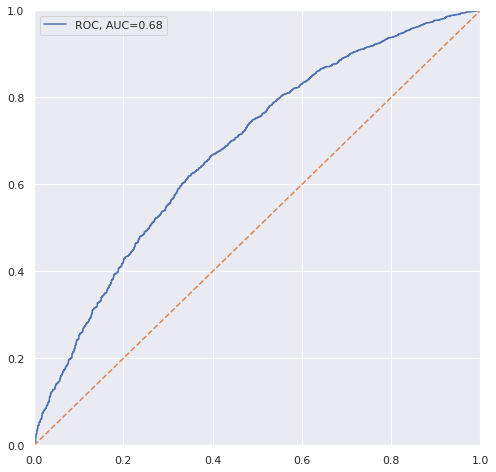

In [9]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(data['employment'], data['prob'])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

此外，在LogisticRegression中不仅仅支持二分类回归，实际上支持多分类的回归（multinomial logit），可以尝试使用，在这里我们不再赘述。

## 决策树

**决策树**（**decision tree**）是一类非常常见的机器学习算法，如果被预测的变量为离散变量，通常也称**分类树**（**classification tree**），如果被预测的变量为连续变量，通常也称为**回归树**（**regression tree**）。

这类算法的思想是使用一种称为**树**（**tree**）的结构对进行预测，实际上相当于对特征空间进行了一些划分，对于每一块划分的区域可以保证其特征比较类似，因而可以用于预测。

为了直观理解这一算法，我们不妨先借用以上的数据做一个简单的模型：

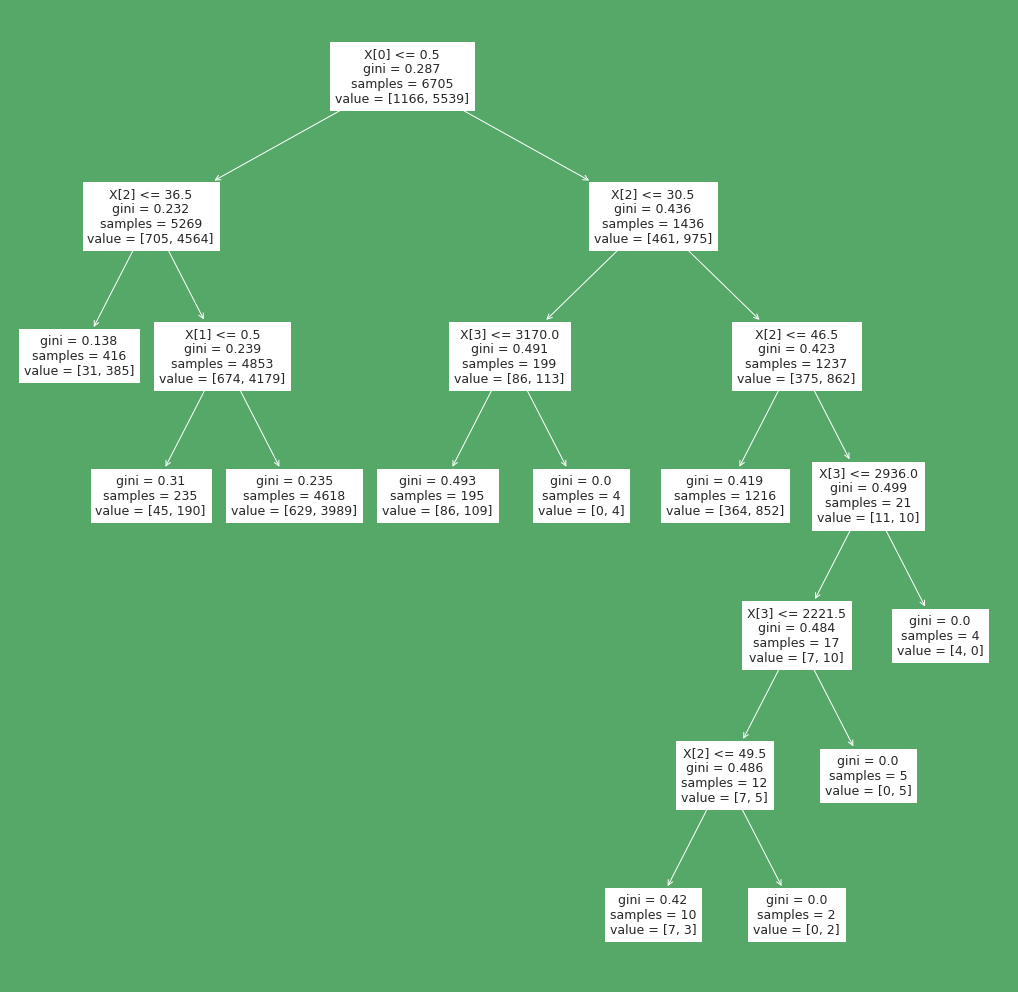

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt
dtree=tree.DecisionTreeClassifier(max_leaf_nodes=10) ##设定最大的叶子数，10
X_example=X[['chld6','husemployment','age','husworkhour']] ##先选3个特征，注意特征中age为连续变量
dtree.fit(X_example,y) ##训练
fig, ax = plt.subplots(figsize=(18, 18), facecolor='g')
tree.plot_tree(dtree, ax=ax) ##画图
plt.show()

上图给出了限定叶子数为10的时候的分类树的结果。其中最上层的节点一般称为**根节点**（**root node**），接下来的是若干子节点，而最终没有自己点的称为**叶节点**（**leaf nodes**）。而从每一个子节点开始，都可以看做是一颗新的树，或者**子树**（**subtree**）。

注意到每个节点都有一个value，代表的是在这个节点上两种分类的样本数量。

回归树的原理是，在每一个节点，通过一定算法，找到能够使得分类更加明确的标准，然后根据这一标准进行分类。其中评价分类是否更加明确的指标通常有Gini系数和熵（DecisionTreeClassifier的criterion选项控制，可以选择'gini'或者'entropy'）。

分出子节点后，子节点又可以看做是一颗新的树，继续查看信息的增益（即分类更加明确的标准），继续分类，以此类推。

然而需要注意的是，树不可能无限的延长，过于长的树非常容易导致过拟合问题，因而有必要对树进行**剪枝**（**pruning**）。或者，实践中也可以在模型设定时限制树的大小，比如：

* max_depth: 最大深度，默认不限制
* max_features: 最多取多少特征，默认不限制，可以提供一个整数，也可以选择：
    - 'auto'：等价于'sqrt'
    - 'sqrt'：特征数的开平方
    - 'log2'：log2(特征数)
* max_leaf_nodes: 叶子的最大个数，默认不限制，可以提供一个整数限制
* min_impurity_decrease: 默认为0，只有当Gini系数或者熵的降低大于这个数字时才产生下一个节点，否则就作为叶子节点

分类树最终的结果是对特征空间进行了一些划分，并使用这些划分作为预测。下面的代码中，我们选取了两个特征，然后将两个特征的划分画出来以直观展示这种划分：

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


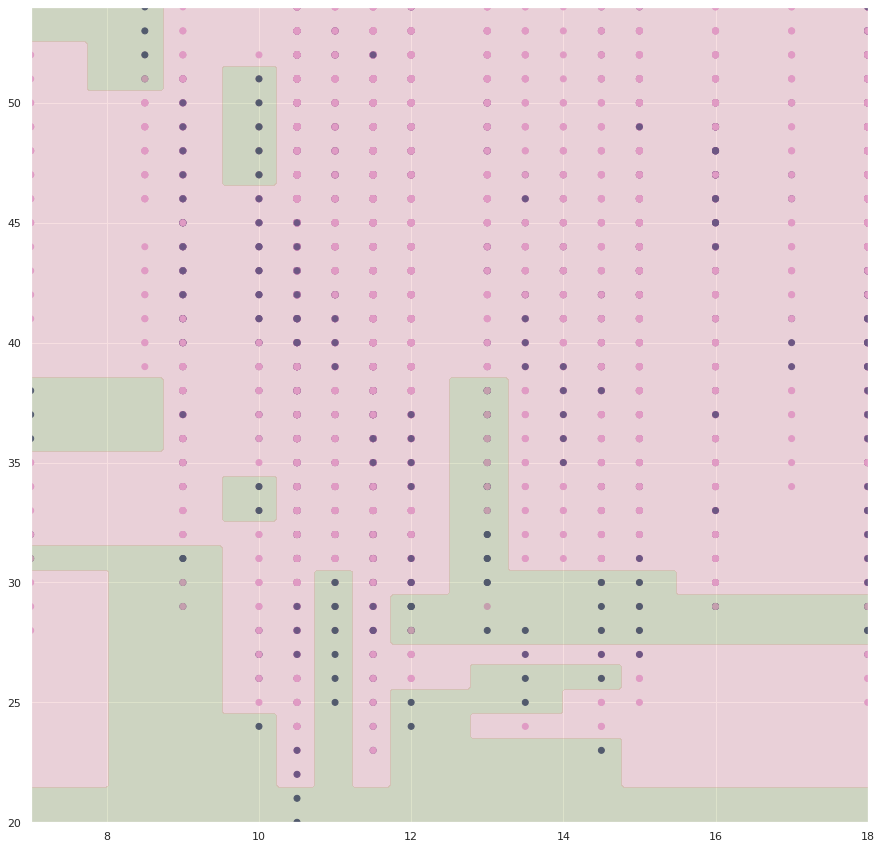

In [11]:
def tree_partion_graph(X, y, figsize_x=15, figsize_y=15):
    import matplotlib.pyplot as plt
    import seaborn as sb
    sb.set()
    plt.rcParams['figure.figsize'] = (figsize_x, figsize_y)
    plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y, cmap='tab20b')
    xx,yy=np.meshgrid(np.linspace(X.iloc[:,0].min(),X.iloc[:,0].max(), num=200),np.linspace(X.iloc[:,1].min(),X.iloc[:,1].max(), num=200))
    xx=xx.reshape(xx.size,1)
    yy=yy.reshape(yy.size,1)
    dtree=tree.DecisionTreeClassifier(max_leaf_nodes=80) ##设定最大的叶子数，10
    dtree.fit(X,y) ##训练
    Z=dtree.predict(np.hstack([xx,yy]))
    plt.xlim(X.iloc[:,0].min(),X.iloc[:,0].max())
    plt.ylim(X.iloc[:,1].min(),X.iloc[:,1].max())
    Z=Z.reshape(200,200)
    xx=xx.reshape(200,200)
    yy=yy.reshape(200,200)
    print(Z)
    plt.contourf(xx,yy,Z,alpha=0.3,levels=np.arange(len(np.unique(y))+1)-0.5,cmap='tab20b',zorder=1)
    plt.show()
    
tree_partion_graph(data[['husedu','age']], data['employment'])

当然，与Logistic回归一样，也可以计算ROC曲线等等：

TP= 5489
TN= 258
FP= 908
FN= 50
查全率=敏感性= 0.9909730998375158
查准率= 0.8580584649054244
特异性= 0.22126929674099485


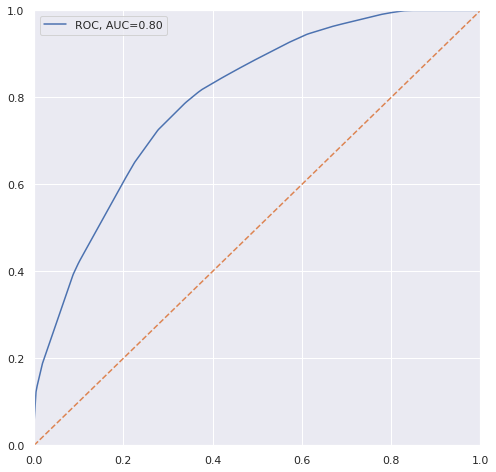

In [12]:
raw_data=pd.read_csv("csv/soep.csv")
raw_data.head()
data=raw_data.set_index(['persnr','year'])
region_dummy=pd.get_dummies(data['region'])
data=pd.concat([data,region_dummy], axis=1)
data=data.drop(['region','0'],axis=1)
data['employment']=data['employment']==data['employment'][0]
y=data['employment']
X=data.drop('employment',axis=1)
dtree=tree.DecisionTreeClassifier(max_depth=8) ##设定最大深度，20
dtree.fit(X,y) ##训练
## 预测及概率
data['prob']=dtree.predict_proba(X)[:,1]
data['pred']=dtree.predict(X)
## 计算指标
TP=np.sum(data['employment'] & data['pred'])
TN=np.sum((~data['employment'] & (~data['pred'])))
FP=np.sum((~data['employment'] & (data['pred'])))
FN=np.sum((data['employment']) & (~data['pred']))

print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("查全率=敏感性=",TP/(TP+FN))
print("查准率=",TP/(TP+FP))
print("特异性=",TN/(TN+FP))

## 画图
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(data['employment'], data['prob'])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

需要注意的是，以上虽然看起来好像AUC提高了很多，但是其实这可能是由于过拟合导致的。如果对样本外做ROC曲线并进行比较可能更加能反应模型的好坏。

最后，决策树也可以做回归，即sklearn.tree.DecisionTreeRegression()，这里不再赘述。

## 随机森林

决策树虽然看起来是一种非常flexible的建模方法，但是也面临着过拟合等问题，剪枝策略也非常容易影响最终效果。为了解决这些问题，我们可以在决策树的基础上进行进一步拓展。

其中的一种做法是**bagging**。Bagging首先通过自助法（bootstrap）的方法对**样本**进行**有放回**抽样（从而抽样得到的样本是可以重复的）抽出$m$个样本，然后使用抽样的样本训练数据集，得到一个模型。

重复以上步骤M次，就可以得到$M$个模型，使用这$M$个模型可以得到$M$个预测结果，然后使用这$M$个预测结果投票即可得到最终结果。

此外，由于Bagging采用了有放回抽样，因而样本中有的样本被抽到多次，有的没有抽到，此时剩下的没有抽到的样本可以用来度量样本外预测能力，即包外估计（out-of-bag estimate）。

以上思路不仅仅对决策树可行，很多机器学习算法都可以使用以上方法改进预测。

在bagging的基础上，**随机森林**（**random forest**）更近了一步。Bagging仅仅在样本中进行有放回抽样，而随机森林则进一步在特征空间中随机抽取特征，即同样重复建立$M$个决策树，每个决策树随机挑选$k$个特征，并使用有放回的抽样方法抽取样本，训练模型。最终$M$个模型通过平均、投票的方式得到最终的估计。一般而言，$k$的选取可以使用一个rule of thumb: $k=\log_2 K$

随机森林实现非常简单，计算量也不大，重要的是预测效果非常好！

比如对于以上数据，使用scikit-learn可以轻松完成随机森林的建模：

TP= 5539
TN= 1062
FP= 104
FN= 0
查全率=敏感性= 1.0
查准率= 0.9815700868332448
特异性= 0.9108061749571184


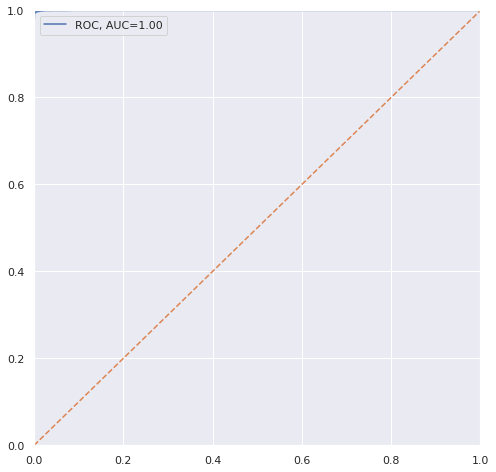

In [13]:
from sklearn.ensemble import RandomForestClassifier
##100颗树，每次bootstrap选取60%样本，特征数量为总数量的log2，本例中总共9个特征所以每个模型为3
rfc=RandomForestClassifier(n_estimators=100, max_samples=0.6, max_features='log2')
rfc.fit(X,y)
## 预测及概率
data['prob']=rfc.predict_proba(X)[:,1]
data['pred']=rfc.predict(X)
## 计算指标
TP=np.sum(data['employment'] & data['pred'])
TN=np.sum((~data['employment'] & (~data['pred'])))
FP=np.sum((~data['employment'] & (data['pred'])))
FN=np.sum((data['employment']) & (~data['pred']))

print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("查全率=敏感性=",TP/(TP+FN))
print("查准率=",TP/(TP+FP))
print("特异性=",TN/(TN+FP))

## 画图
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(data['employment'], data['prob'])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()